### Load the libraries and dataset

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data', header=None, names = col_names)

#Distribution of income
print('Distribution of income')
income_classes = (df.value_counts(df.income))
income_dist_more50k = round(income_classes.iloc[0]/(len(df))*100,2)
income_dist_less50k = round(income_classes.iloc[1]/(len(df))*100,2)
print(f'Income more tha 50k income: {income_dist_more50k}')
print(f'Income less than 50k income: {income_dist_less50k}')

Distribution of income
Income more tha 50k income: 75.92
Income less than 50k income: 24.08


### Display the information of the dataset

In [288]:
display(df.describe())
display(df.info())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

### Clean the string columns

In [289]:
#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Create a list of features and target 

In [290]:
#Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
X = pd.get_dummies(df[feature_cols], drop_first=True)

#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
y = np.where(df.income == '<=50K',0,1)

#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Accuracy of the base model

In [291]:
#Instantiate random forest classifier, fit and score with default parameters
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Acurracy of the base model:')
print(rfc.score(x_test, y_test))

Acurracy of the base model:
0.8182097343773991


### Tune max_depth Hyperparameter

In [292]:
#Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,26)
for i in depths:
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(x_train, y_train)
    accuracy_train.append(accuracy_score(y_train, rfc.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, rfc.predict(x_test)))
    
#Find the best accuracy and at what depth that occurs
print('The best accuracy is:')
print(np.max(accuracy_test))
print('The depth at max accuracy is:')
best_depth = depths[np.argmax(accuracy_test)]
print(best_depth)

The best accuracy is:
0.8306463995086749
The depth at max accuracy is:
13


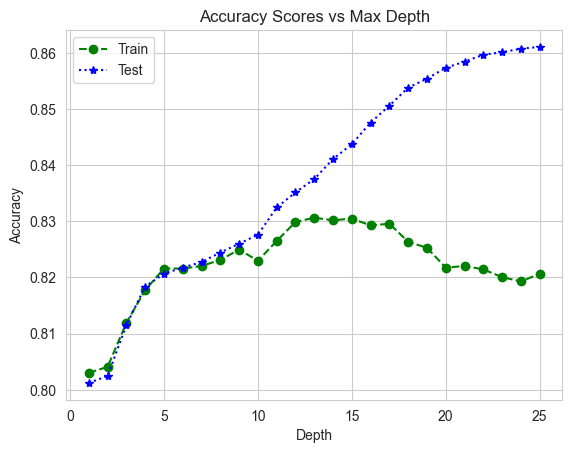

<Figure size 640x480 with 0 Axes>

In [293]:
#Plot the accuracy scores for the test and train set over the range of depth values  
sns.set_style('whitegrid')
plt.plot(depths, accuracy_test,'go--',depths, accuracy_train,'b*:')
plt.title('Accuracy Scores vs Max Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()
plt.clf()

The top 5 features of the best random forest model are:


,feature,importance
1,capital-gain,0.355792
0,age,0.258290
3,hours-per-week,0.145296
2,capital-loss,0.138583
4,sex_Male,0.081703


The accuracy of the model with the best max_depth is:
0.8298787041302012


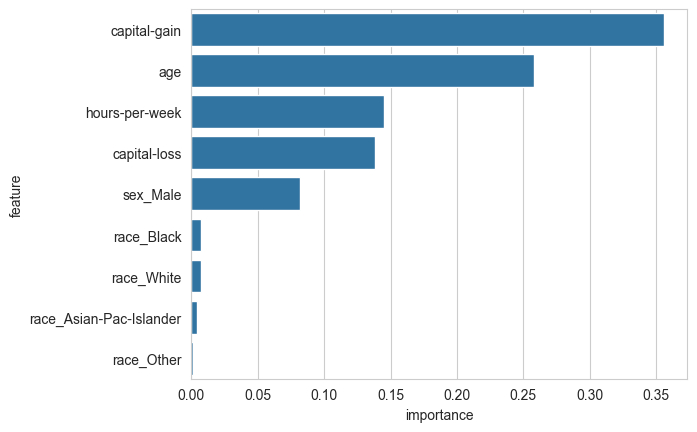

In [294]:
#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
importances = pd.DataFrame(zip(x_train.columns,best_rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())
print('The accuracy of the model with the best max_depth is:')
print(accuracy_score(y_test, best_rf.predict(x_test)))
sns.barplot(x=importances.importance, y=importances.feature)
plt.show()
plt.close()

### Create two new features by grouping education categories

In [295]:
#Create two new features, based on education and native country
df['education_bin'] = pd.cut(df['education-num'], [0,9,13,16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']
#Use these two new additional features and recreate X and test/train split
x = pd.get_dummies(df[feature_cols], drop_first=True)

x_train,x_test,y_train,y_test = train_test_split = train_test_split(x,y,test_size=0.2, random_state=42)

#Find the best max depth now with the additional two features
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,26)
for i in depths:
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(x_train, y_train)
    accuracy_train.append(accuracy_score(y_train, rfc.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,rfc.predict(x_test)))
    
#Find the best accuracy and at what depth that occurs
print('The best accuracy is:')
print(np.max(accuracy_test))
print('The depth at max accuracy is:')
best_depth = np.argmax(accuracy_test)
print(best_depth)

The best accuracy is:
0.8436972209427299
The depth at max accuracy is:
11


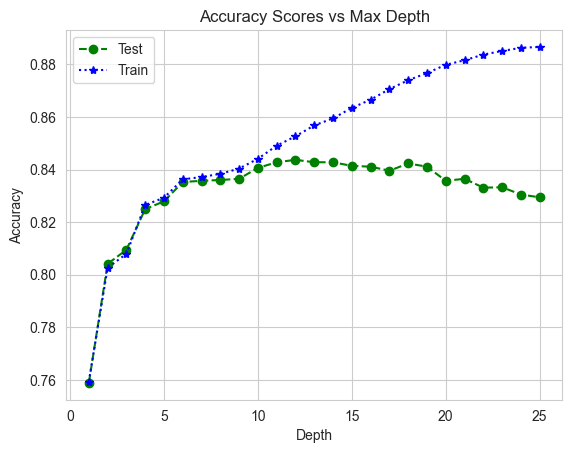

In [296]:
plt.plot(depths, accuracy_test,'go--',depths, accuracy_train,'b*:')
plt.title('Accuracy Scores vs Max Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])
plt.show()
plt.close()

The top 5 features of the best random forest model are:


,feature,importance
1,capital-gain,0.307448
0,age,0.209568
10,education_bin_Masters or more,0.119343
3,hours-per-week,0.112090
2,capital-loss,0.101333


The accuracy of the model with the best max_depth is:
0.8415476738830032


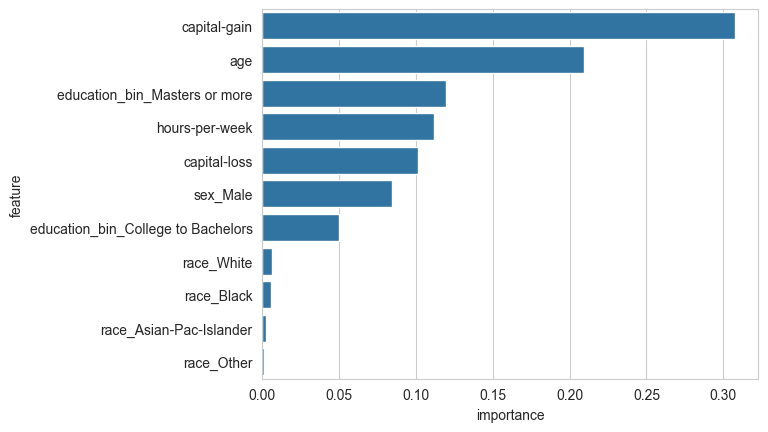

In [297]:
#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
importances = pd.DataFrame(zip(x_train.columns,best_rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())
print('The accuracy of the model with the best max_depth is:')
print(accuracy_score(y_test, best_rf.predict(x_test)))
sns.barplot(x=importances.importance, y=importances.feature)
plt.show()
plt.close()

### Tune n_estimators Hyperparameter

In [298]:
# Find the best number of estimators for the random forest model
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
estimators = range(1,26)
for i in estimators:
    rfc = RandomForestClassifier(max_depth = best_depth, n_estimators=i)
    rfc.fit(x_train, y_train)
    accuracy_train.append(accuracy_score(y_train, rfc.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,rfc.predict(x_test)))
    
#Find the best accuracy and at what n_estimators
print('The best accuracy is:')
print(np.max(accuracy_test))
print('The number of estimators with the best n_estimators is:')
best_estimators = estimators[np.argmax(accuracy_test)]
print(best_estimators)

The best accuracy is:
0.8452326116996776
The number of estimators with the best n_estimators is:
25


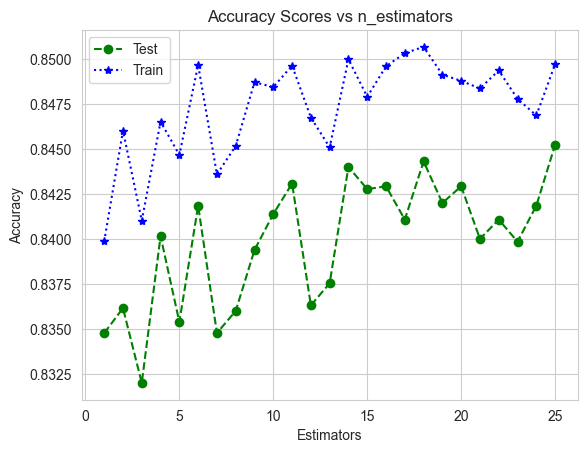

In [299]:
#plot the accuracy score for each estimator
plt.plot(estimators, accuracy_test,'go--',estimators, accuracy_train,'b*:')
plt.title('Accuracy Scores vs n_estimators')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])
plt.show()
plt.close()

The top 5 features of the best random forest model are:


,feature,importance
1,capital-gain,0.302750
0,age,0.210248
10,education_bin_Masters or more,0.123741
3,hours-per-week,0.115872
2,capital-loss,0.092457


The accuracy of the model with the best max_depth and best n_estimators is:
0.8400122831260556


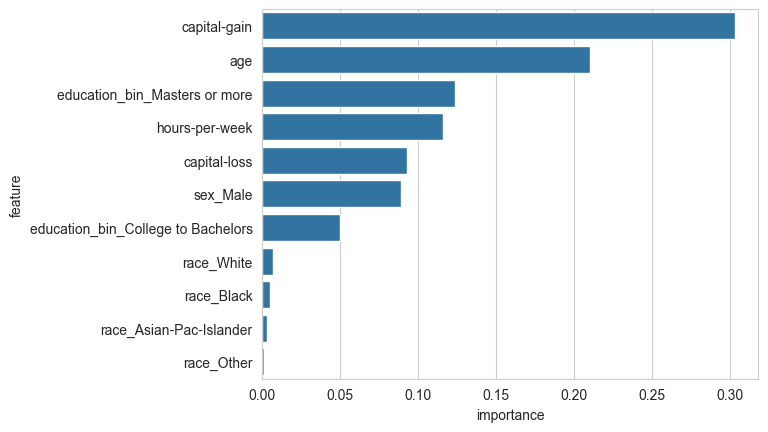

In [300]:
#Save the best random forest model best max_depth and best n_estimators and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimators)
best_rf.fit(x_train, y_train)
importances = pd.DataFrame(zip(x_train.columns,best_rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())
print('The accuracy of the model with the best max_depth and best n_estimators is:')
print(accuracy_score(y_test, best_rf.predict(x_test)))
sns.barplot(x=importances.importance, y=importances.feature)
plt.show()
plt.close()

### Tune max_features Hyperparameter

In [301]:
# Find the best number of features for each estimator
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
features = range(1,26)
for i in features:
    rfc = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimators, max_features=i)
    rfc.fit(x_train, y_train)
    accuracy_train.append(accuracy_score(y_train, rfc.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,rfc.predict(x_test)))
    
#Find the best accuracy and at what max_features
print('The best accuracy is:')
print(np.max(accuracy_test))
print('The number of features with the best max_features is:')
best_features = features[np.argmax(accuracy_test)]
print(best_features)

The best accuracy is:
0.8461538461538461
The number of features with the best max_features is:
25


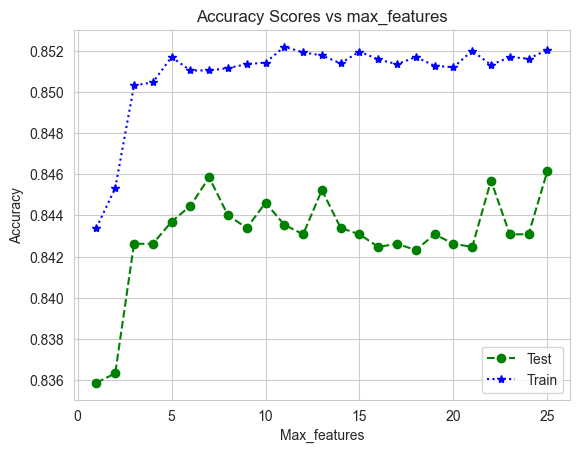

In [302]:
#plot the accuracy score for each number of features
plt.plot(features, accuracy_test,'go--',features, accuracy_train,'b*:')
plt.title('Accuracy Scores vs max_features')
plt.xlabel('Max_features')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])
plt.show()
plt.close()

The top 5 features of the best random forest model are:


,feature,importance
1,capital-gain,0.347975
0,age,0.212069
2,capital-loss,0.114383
4,sex_Male,0.084296
10,education_bin_Masters or more,0.083860


The accuracy score with best depth, best n_estimators and best max_features is:
0.8438507600184247


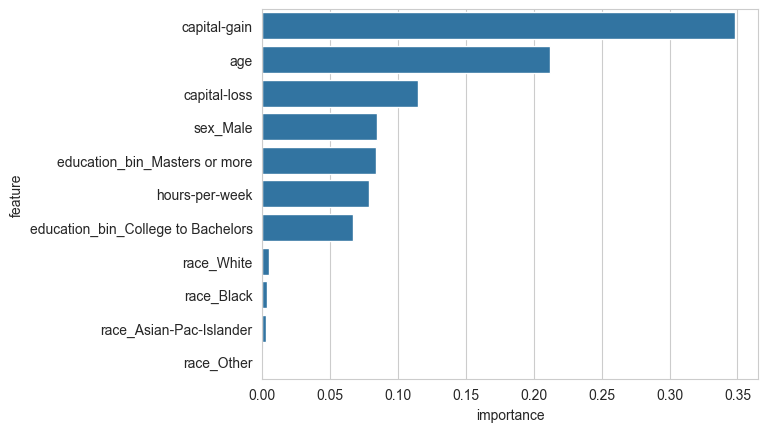

In [303]:
#Save the best random forest model with the best max_depth, n_estimation and max_features and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth, n_estimators = best_estimators, max_features = best_features)
best_rf.fit(x_train, y_train)
importances = pd.DataFrame(zip(x_train.columns,best_rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())
print ('The accuracy score with best depth, best n_estimators and best max_features is:')
print(accuracy_score(y_test,best_rf.predict(x_test)))
sns.barplot(x=importances.importance, y=importances.feature)
plt.show()
plt.close()

### Evalaute Precision Performance

In [304]:
# Evalaute performance based on the precision_score
np.random.seed(0)
precision_train=[]
precision_test = []
features = range(1,26)
for i in features:
    rfc = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimators, max_features=i)
    rfc.fit(x_train, y_train)
    precision_train.append(precision_score(y_train, rfc.predict(x_train)))
    precision_test.append(precision_score(y_test,rfc.predict(x_test)))
    
#Find the best precision and at with what max_features
print('The best precision is:')
print(np.max(precision_test))
print('The number of features at max accuracy is:')
best_features = features[np.argmax(precision_test)]
print(best_features)

The best precision is:
0.8495821727019499
The number of features at max accuracy is:
1


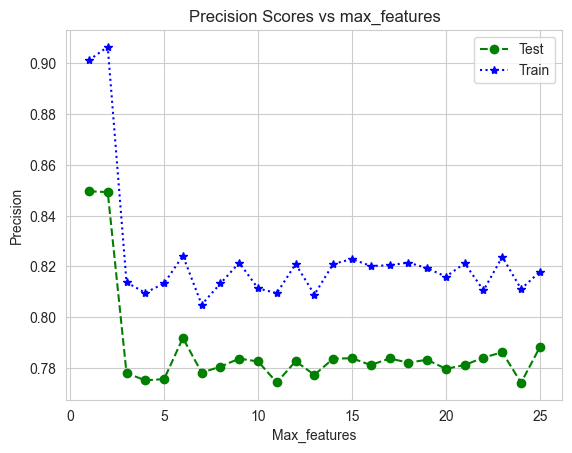

In [305]:
#plot the accuracy score for each number of features
plt.plot(features, precision_test,'go--',features, precision_train,'b*:')
plt.title('Precision Scores vs max_features')
plt.xlabel('Max_features')
plt.ylabel('Precision')
plt.legend(['Test','Train'])
plt.show()
plt.close()

### Evaluate f1_score Performance

In [306]:
# Evalaute performance based on the f1 score
np.random.seed(0)
f1_train=[]
f1_test = []
features = range(1,26)
for i in features:
    rfc = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimators, max_features=i)
    rfc.fit(x_train, y_train)
    f1_train.append(f1_score(y_train, rfc.predict(x_train)))
    f1_test.append(f1_score(y_test,rfc.predict(x_test)))
    
#Find the best precision and at with what max_features
print('The best f1 score is:')
print(np.max(f1_test))
print('The number of features at max f1 score is:')
best_features = features[np.argmax(f1_test)]
print(best_features)

The best f1 score is:
0.6123552123552124
The number of features at max f1 score is:
7


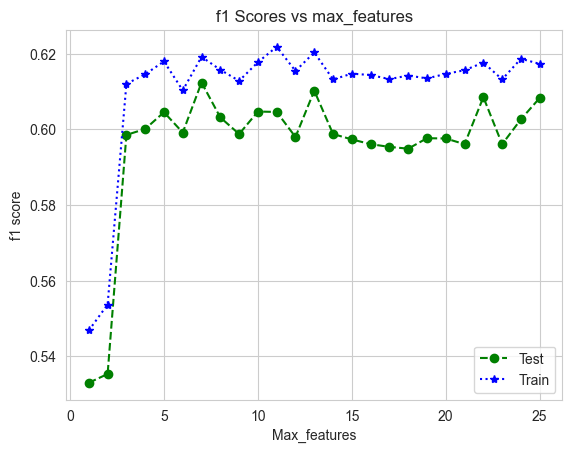

In [307]:
#plot the f1 score for each number of features
plt.plot(features, f1_test,'go--',features, f1_train,'b*:')
plt.title('f1 Scores vs max_features')
plt.xlabel('Max_features')
plt.ylabel('f1 score')
plt.legend(['Test','Train'])
plt.show()
plt.close()

### Testing Different Features

The top 5 features of the best random forest model are:


,feature,importance
1,capital-gain,0.466902
0,age,0.286641
2,capital-loss,0.201028
7,workclass_ Self-emp-inc,0.027415
3,workclass_ Federal-gov,0.007477


The accuracy score with best depth, best n_estimators and best max_features is:
0.8288039306003377


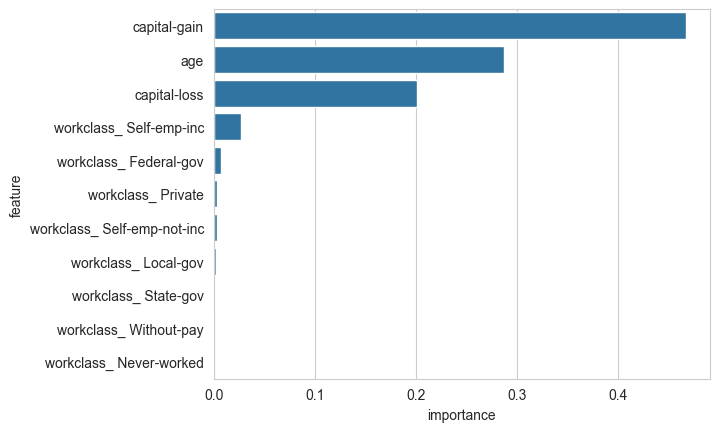

In [310]:
# Alternative feature lists
feature_cols = ['age', 'capital-gain', 'capital-loss','workclass']
X = pd.get_dummies(df[feature_cols], drop_first=True)

#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#test the best model
best_rf = RandomForestClassifier(max_depth=best_depth, n_estimators = best_estimators, max_features = best_features)
best_rf.fit(x_train, y_train)
importances = pd.DataFrame(zip(x_train.columns,best_rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())
print ('The accuracy score with best depth, best n_estimators and best max_features is:')
print(accuracy_score(y_test,best_rf.predict(x_test)))
sns.barplot(x=importances.importance, y=importances.feature)
plt.show()
plt.close()